# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [10]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_2D, plotting
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn.preprocessing import LabelEncoder

          0         1
0  2.947227  3.493348
1  2.589979  3.314163
2  1.156683  2.899786
3  0.373611  2.803841
4  3.390828  2.583229


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


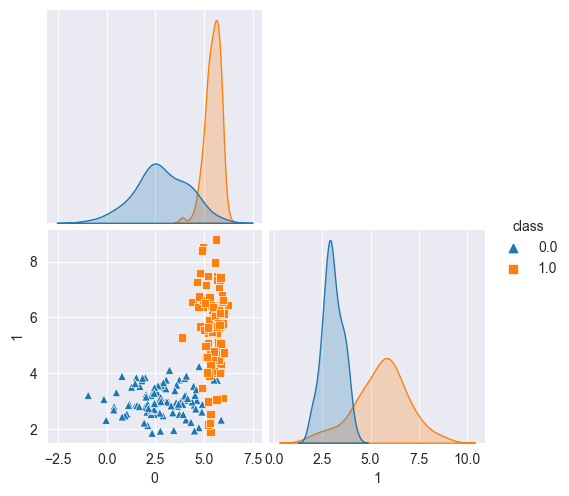

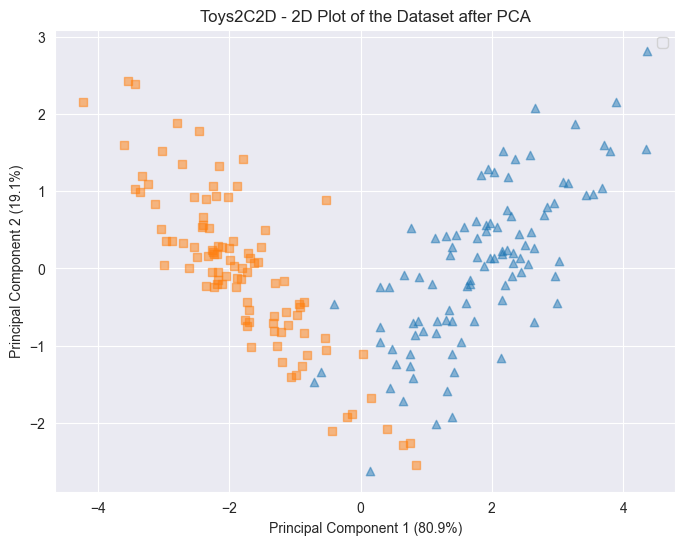

In [11]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

## Traditional ECM

[1, 186.1919599449282]
[2, 183.87704137993845]
[3, 183.57411380092609]
[4, 183.51201823944234]
[5, 183.4903513919742]
[6, 183.48113806290436]
[7, 183.47727473299457]
[8, 183.4758061914255]
[9, 183.47535630019817]
[  0.        183.4753563 183.4753563]
[1, 186.1919599449282]
[2, 183.87704137993845]
[3, 183.57411380092609]
[4, 183.51201823944234]
[5, 183.4903513919742]
[6, 183.48113806290436]
[7, 183.47727473299457]
[8, 183.4758061914255]
[9, 183.47535630019817]
[  1.        183.4753563 183.4753563]
[1, 186.1919599449282]
[2, 183.87704137993845]
[3, 183.57411380092609]
[4, 183.51201823944234]
[5, 183.4903513919742]
[6, 183.48113806290436]
[7, 183.47727473299457]
[8, 183.4758061914255]
[9, 183.47535630019817]
[  2.        183.4753563 183.4753563]
[1, 186.1919599449282]
[2, 183.87704137993845]
[3, 183.57411380092609]
[4, 183.5120182394423]
[5, 183.49035139197414]
[6, 183.48113806290436]
[7, 183.47727473299457]
[8, 183.4758061914255]
[9, 183.47535630019817]
[  3.        183.4753563 183.47535

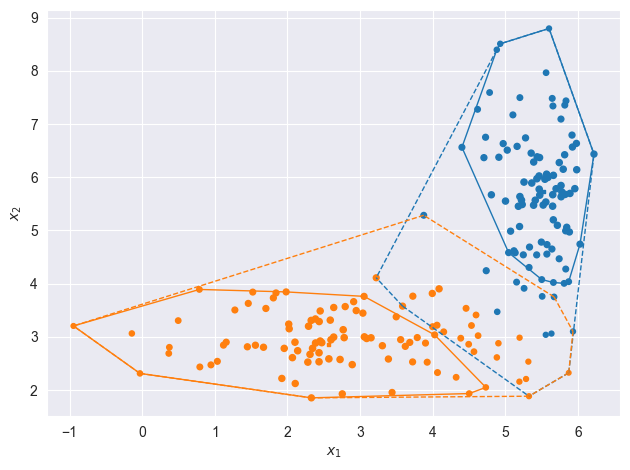

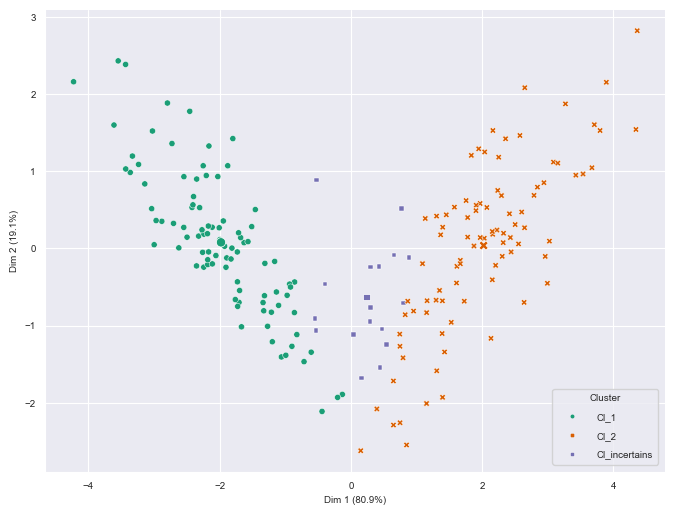

In [8]:
# Traditional ECM clustering
delta = np.sqrt(20)
model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
ri = rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Rand Index (RI): {ri}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plots
ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

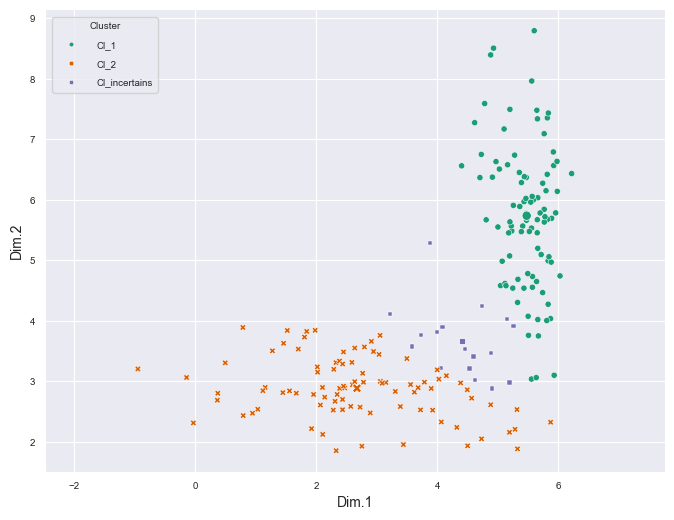

In [9]:
ev_plot_2D(data=dataset[:, :-1], x=model, normalize=False, cex=20)

## Weighted ECM (WECM)

In [12]:
# Weighted ECM clustering
# W = np.array([
#     [0.25700229, 0.74299771],
#     [0.79224938, 0.20775062]
# ])
model_list = np.array([])
for i in range(30):
    c = 2
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, W=None, beta=2, alpha=1, delta=delta, ntrials=10)
    model_list = np.append(model_list, model)

# Get best 10 models with minimum values
num = 10
model_list = sorted(model_list, key=lambda x : x['crit'])
print([x['crit'] for x in model_list])
top_weights = [model['W'] for model in model_list[:num]]

# Get ARI values of top 10
true_labels = numeric_labels
predicted_labels_list = [np.argmax(model['betp'], axis=1) for model in model_list[:num]]
top_aris = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]
print(f"ARIs: {top_aris}")

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list[:num]]
print(f"Non-specificities: {top_NS}")


Initial weights: 
 [[0.90861386 0.09138614]
 [0.7803069  0.2196931 ]]
---------Iteration #1---------
Initial prototypes: 
 [[2.88033069 2.95820469]
 [5.44921707 5.68144983]]
[1, 63.2495415635885]
[2, 51.221974409814806]
[3, 49.37132852191253]
[4, 48.9446186678333]
[5, 48.83338149680564]
[6, 48.81005887687413]
[7, 48.811163017218284]
[8, 48.81767066703576]
[9, 48.82405191576685]
[10, 48.82901734654508]
[11, 48.83255723853399]
[12, 48.83497588172996]
[13, 48.83659057676118]
[14, 48.83765412056375]
[15, 48.838348956524136]
[ 0.         48.83834896 48.83834896]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[2.88033069 2.95820469]
 [5.44921707 5.68144983]]
[1, 63.2495415635885]
[2, 51.221974409814806]
[3, 49.37132852191253]
[4, 48.9446186678333]
[5, 48.83338149680564]
[6, 48.81005887687413]
[7, 48.811163017218284]
[8, 48.81767066703576]
[9, 48.82405191576685]
[10, 48.82901734654508]
[11, 48.83255723853399]
[12, 48.83497588172996]
[13, 48.8365905767

----------Weighted ECM----------
Jbest: 24.046998525279733
Centers: 
[[2.22268814 2.94176635]
 [5.46280819 4.6856225 ]]
Weights: 
[[0.15507751 0.84492249]
 [0.95891441 0.04108559]]
Adjusted Rand Index (ARI) of the best J: 0.9015268616437867
Average ARI: 0.8093343200189983
Average Non-specificity: 0.772297342160228


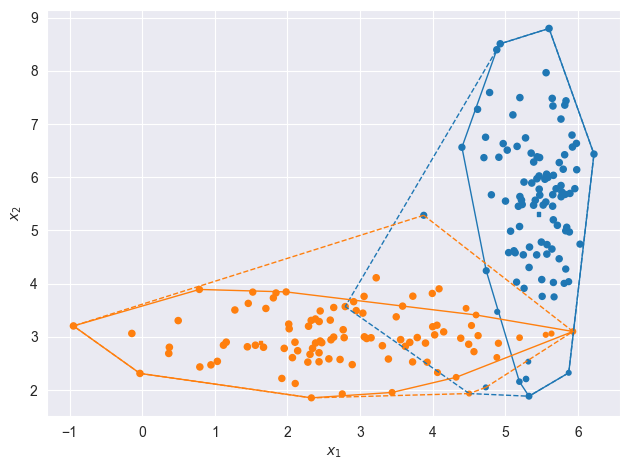

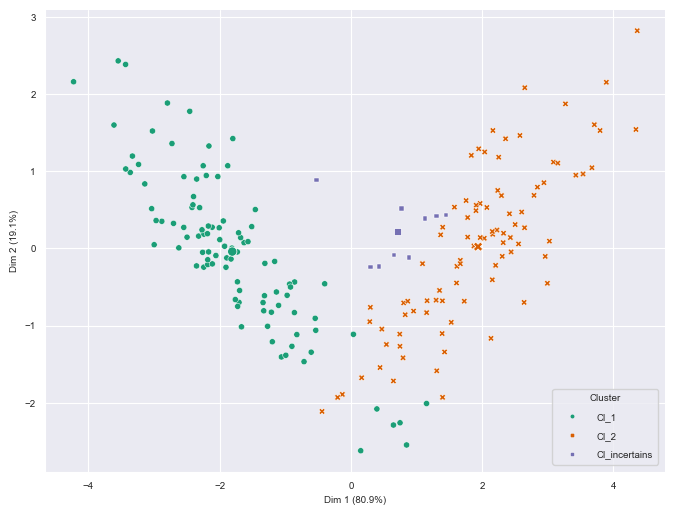

In [14]:
best_model = model_list[0]
print("----------Weighted ECM----------")
print(f"Jbest: {best_model['crit']}")
print(f"Centers: \n{best_model['g']}")
print(f"Weights: \n{best_model['W']}")
print(f"Adjusted Rand Index (ARI) of the best J: {top_aris[0]}")
print(f"Average ARI: {np.mean(top_aris)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")

# Plotting
ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

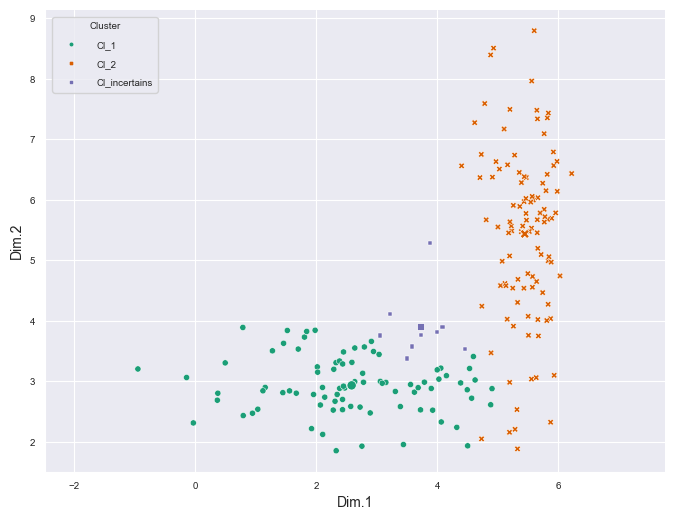

In [16]:
ev_plot_2D(data=dataset[:, :-1], x=best_model, normalize=False, cex=20)

In [17]:
for W in top_weights:
    print(f"\n{W}")


[[0.15507751 0.84492249]
 [0.95891441 0.04108559]]

[[0.97268087 0.02731913]
 [0.19576069 0.80423931]]

[[0.86568316 0.13431684]
 [0.06098839 0.93901161]]

[[0.08891096 0.91108904]
 [0.85590003 0.14409997]]

[[0.87961785 0.12038215]
 [0.35378335 0.64621665]]

[[0.26665065 0.73334935]
 [0.81978034 0.18021966]]

[[0.1906081  0.8093919 ]
 [0.76913488 0.23086512]]

[[0.67965663 0.32034337]
 [0.15551082 0.84448918]]

[[0.08061325 0.91938675]
 [0.61809854 0.38190146]]

[[0.57103451 0.42896549]
 [0.89739147 0.10260853]]


## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)